In [3]:
# Mašininis mokymasis

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
ins = pd.read_csv('../../../insurance.csv'); ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='age', ylabel='charges'>

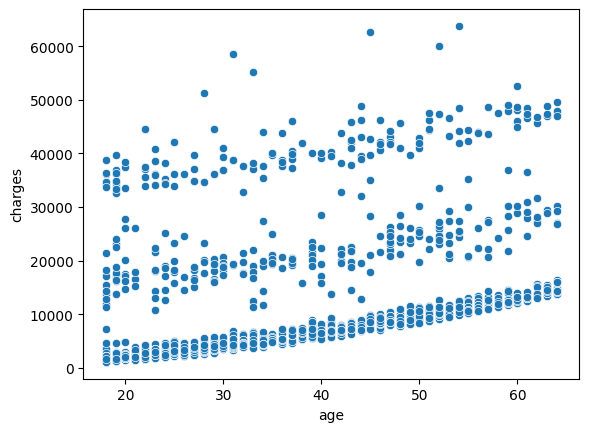

In [12]:
sns.scatterplot(data = ins, x = 'age', y = 'charges')

In [19]:
X = ins['age'].values.reshape(-1, 1)
y = ins['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
len(X_train)

896

In [21]:
fit = LinearRegression().fit(X_train, y_train)

In [22]:
predicted = fit.predict(X_test); predicted

array([14794.08786402, 12586.24456412, 19455.09038601, 15039.40378623,
        8415.87388655, 12095.6127197 ,  8415.87388655, 19455.09038601,
       10623.71718644, 15775.35155286, 11114.34903086, 13812.82417517,
       10869.03310865, 15039.40378623, 18473.82669717, 15284.71970844,
       15775.35155286, 15284.71970844, 15039.40378623, 14303.4560196 ,
        9887.76941981, 14303.4560196 ,  8415.87388655,  9151.82165318,
       16020.66747507, 17001.93116391, 18473.82669717, 10378.40126423,
       15284.71970844,  8170.55796434, 13567.50825296, 17737.87893054,
        8906.50573097, 11114.34903086, 10133.08534202, 14794.08786402,
        8906.50573097, 14303.4560196 , 16511.29931949, 12586.24456412,
        8415.87388655,  9151.82165318, 17492.56300833, 18228.51077496,
       11850.29679749, 18228.51077496,  8906.50573097,  9887.76941981,
       14303.4560196 , 11359.66495307, 19209.7744638 ,  8170.55796434,
       13567.50825296,  8170.55796434, 17492.56300833, 16020.66747507,
      

In [28]:
spejimai = pd.Series(data=predicted, name='Spėjimai'); spejimai
orig_rez = pd.Series(data=y_test, name='YTest')


In [29]:
res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis = 1); res.head()

,YTest,Spėjimai
0,9095.06825,14794.087864
1,5272.17580,12586.244564
2,29330.98315,19455.090386
3,9301.89355,15039.403786
4,33750.29180,8415.873887


<Axes: >

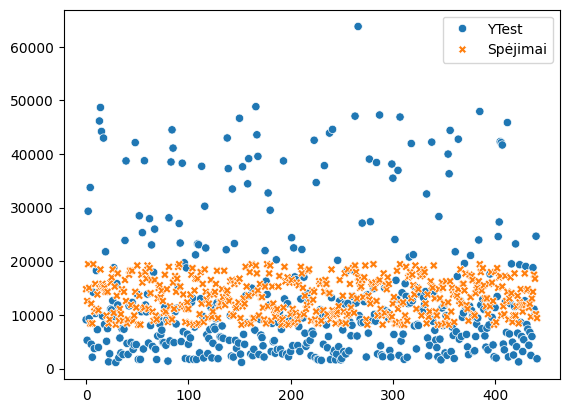

In [30]:
sns.scatterplot(data=res)

In [31]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
X = ins[['age', 'bmi', 'children']]
y = ins['charges']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
fit = LinearRegression().fit(X_train, y_train)

In [35]:
pred = fit.predict(X_test)

In [36]:
spejimai = pd.Series(data=pred, name='Spėjimai')

In [37]:
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis = 1); res.head()

,charges,Spėjimai
0,9095.06825,13579.609770
1,5272.17580,11744.155812
2,29330.98315,17097.387504
3,9301.89355,14656.906730
4,33750.29180,8492.898248


<Axes: >

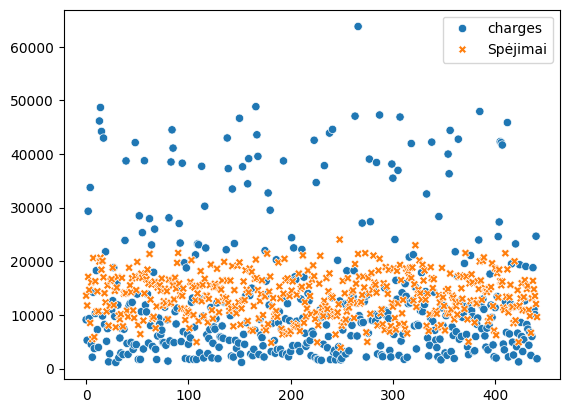

In [38]:
sns.scatterplot(data=res)

In [39]:
fit.score(X_test, y_test)*100.0

13.51277604693102

In [49]:
sex = pd.get_dummies(ins['sex'])
ins2 = pd.concat([ins, sex], axis=1); ins2
sm = pd.get_dummies(ins['smoker'])
ins3 = pd.concat([ins2, sm], axis=1); ins3
rg = pd.get_dummies(ins3['region'])
ins3 = pd.concat([ins3, rg], axis=1)

In [75]:
X = ins3.drop(columns=['sex', 'smoker', 'region', 'charges'])
y = ins3['charges']; X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)

In [76]:
fit.score(X_test, y_test)*100.0

76.96118054369012

In [77]:
spejimai = pd.Series(data=pred, name='Spėjimai')
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis = 1); res.head()

,charges,Spėjimai
0,9095.06825,9016.367529
1,5272.17580,7019.976349
2,29330.98315,36870.834268
3,9301.89355,9518.537736
4,33750.29180,26974.030822


<Axes: >

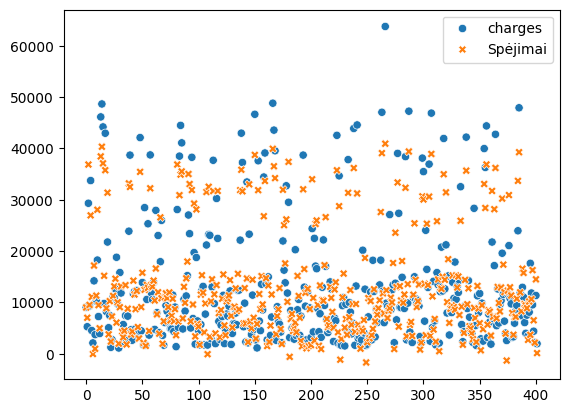

In [78]:
sns.scatterplot(data=res)

In [79]:
X.columns

Index(['age', 'bmi', 'children', 'female', 'male', 'no', 'yes', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [80]:
X

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


In [81]:
fit.predict(np.reshape([32,22,1,True,False,True,False,False,True,False,False], (1,-1)))

array([3600.67432085])

In [82]:
mpg = sns.load_dataset('mpg'); mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [ ]:
# Naudojamas seaborn pateikiamas duomenų rinkinys. Užduotis:
# Sukurti tiesinės regresijos modelį, kuris prognozuotų automobilio
# degalų suvartojimą (mpg - miles per gallon).
# Prid4kite vartotojo įvestį

In [84]:
origin = pd.get_dummies(mpg['origin'])
mpg2 = pd.concat([mpg, origin], axis=1); mpg2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,False,False,True
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,True,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,False,False,True
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,False,False,True


In [90]:
mpg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
 9   europe        398 non-null    bool   
 10  japan         398 non-null    bool   
 11  usa           398 non-null    bool   
dtypes: bool(3), float64(4), int64(3), object(2)
memory usage: 29.3+ KB


In [91]:
mpg2.dropna(inplace=True)

In [92]:

X = mpg2.drop(columns=['mpg','origin', 'name'])
y = mpg2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)

In [93]:
fit.score(X_test, y_test)*100.0

79.64817032975604

In [94]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'europe', 'japan', 'usa'],
      dtype='object')

In [101]:
rep = True
while rep:
    try:
        rep = True
        x = np.nan
        cylinders = np.nan
        displacement = np.nan
        horsepower = np.nan
        weight = np.nan
        asc = np.nan
        amzius = np.nan
        europe = False
        japan = False
        usa = False
        cylinders = int(input('Nurodykite automobilio cilindrų skaičių'))
        displacement = float(input('Nurodykite automobilio variklio tūrį'))
        horsepower = float(input('Nurodykite automobilio arklio galias'))
        weight = int(input('Nurodykite automobilio svorį'))
        asc = float(input('Nurodykite automobilio įsibėgėjimo laiką'))
        amzius = int(input('Nurodykite automobilio amžių'))
        origin = input('Pasirinkite iš kokio regiono automobilis (europe, japan, usa)')
        if origin == 'europe':
            europe = True
            japan = False
            usa = False
        elif origin == 'japan':
            europe = False
            japan = True
            usa = False
        elif origin == 'usa':
            europe = False
            japan = False
            usa = True
        else:
            print('Blogai įvestas regionas')
        rep = False
    except:
        print('Buvo įvesta ne skaičiai')
    
x = fit.predict(np.reshape([cylinders,displacement,horsepower,weight,asc,amzius,europe,japan,usa], (1,-1)))[0]
print(f'{round(x,1)} MPG')

13.7 MPG


In [102]:
fish = pd.read_csv('../../../Fish.csv'); fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
# Turime lentelę su 7-niomis žuvų rūšim, bei įvairiais jų
# išmatavimais. Vienas iš jų yra svoris (weight) - tai bus target
# stulpelis. Sukurkite tiesinės regresijos modelį, kuris pagal kitus
# lentelės stulpelius spėlios žuvies svorį.

In [104]:
species = pd.get_dummies(fish['Species'])
fish2 = pd.concat([fish, species], axis=1); fish2

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


In [103]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [106]:

X = fish2.drop(columns=['Species','Weight'])
y = fish2['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)

In [107]:
fit.score(X_test, y_test)*100.0

94.05192628555376

In [108]:
X.columns

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream', 'Parkki',
       'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='object')

In [111]:
x = fit.predict(np.reshape([23.2,25.4,30,11.52,4.02,True,False,False,False,False,False,False], (1,-1)))[0]
print(f'{round(x,1)} g')

293.5 g
